## 라이브러리 import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

스케일러 라이브러리

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [181]:
for i in range (100):
    temp_data = pd.read_csv('D:/testoneblow/sidewall thickness data/dp%d-blow-thick-sidewallcut.csv'%(i+1), sep=',')
    s = "thickness_dp%d = temp_data.iloc[:,1:]"%(i+1)
    exec(s)

In [182]:
thickness_dp1

,Curve Length on Polyline 1 [ m ],THICKNESS [ m ]
0,0.018458,0.000639
1,0.020766,0.000563
2,0.023228,0.000525
3,0.025537,0.000469
4,0.028286,0.000401
5,0.031332,0.000353
6,0.034518,0.000308
7,0.038071,0.000259
8,0.042211,0.000210
9,0.046897,0.000173


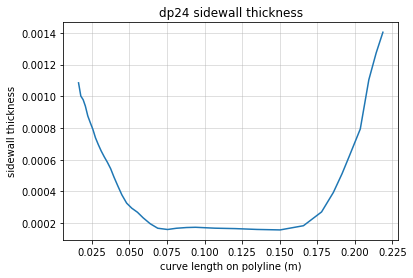

In [193]:
plt.grid(alpha = 0.5)
plt.title("dp24 sidewall thickness")
plt.xlabel("curve length on polyline (m)")
plt.ylabel("sidewall thickness")
plt.plot(thickness_dp24.iloc[:,0],thickness_dp24.iloc[:,1])
plt.savefig("C:/Users/SDML/Desktop/figure1.jpg")

## Max-Min label (peak만 잡아서 하기)

In [170]:
temp_peak_index = []
temp_peak_value = []
for i in range(thickness_dp31.shape[0]-2):
    if thickness_dp31.iloc[i,1]<thickness_dp31.iloc[i+1,1]:
        if thickness_dp31.iloc[i+1,1]>thickness_dp31.iloc[i+2,1]:
            temp_peak_index = np.append(temp_peak_index, i+1)

for j in range(temp_peak_index.shape[0]):
    temp_peak_value = np.append(temp_peak_value,temp_thick.iloc[int(temp_peak_index[j]),1])
    
temp_peak_index, temp_peak_value


(array([28., 31., 36.]), array([0.00070525, 0.00068725, 0.00069078]))

In [162]:
np.max(temp_peak_value)

0.000705248211

In [172]:
np.min(thickness_dp31.iloc[:,1])

0.000241155154

In [158]:
temp_peak_index.shape[0]

3

In [101]:
thickness_dp1.iloc[int(temp_peak_index[0]),1]

0.00116190827

In [174]:
Mm_Label2 = []
nonepeak_dp = []
for k in range(100):
    temp_peak_index = []
    temp_peak_value = []
    exec("temp_thick = thickness_dp%d"%(k+1))
    for i in range(temp_thick.shape[0]-2):
        
        if temp_thick.iloc[i,1]<temp_thick.iloc[i+1,1]:
            if temp_thick.iloc[i+1,1]>temp_thick.iloc[i+2,1]:
                temp_peak_index = np.append(temp_peak_index, i+1)
                
    if type(temp_peak_index) == list:
        temp_peak_value = np.append(temp_peak_value , np.max(temp_thick.iloc[:,1]))
        nonepeak_dp = np.append(nonepeak_dp,k+1)
    else:
        for j in range(temp_peak_index.shape[0]):
            temp_peak_value = np.append(temp_peak_value,temp_thick.iloc[int(temp_peak_index[j]),1])
    
    temp_label = np.max(temp_peak_value)-np.min(temp_thick.iloc[:,1])
    Mm_Label2 = np.append(Mm_Label2,temp_label)



In [179]:
pd.set_option('display.max_rows',100)
pd.DataFrame(Mm_Label2)

,0
0,0.001040
1,0.001311
2,0.000363
3,0.000404
4,0.000604
5,0.000004
6,0.001525
7,0.000049
8,0.000526
9,0.001325


In [194]:
np.max(Mm_Label2)

0.0015248948311000002

In [195]:
np.min(Mm_Label2)

3.983703000000002e-06

In [192]:
nonepeak_dp

array([10., 12., 14., 15., 18., 23., 33., 36., 37., 39., 40., 43., 53.,
       54., 55., 60., 61., 69., 73., 74., 83., 89., 97.])

## Max-Min label

In [30]:
Mmlabel_list = []
for k in range(100):
    exec("temp_thick = thickness_dp%d"%(k+1))
    
    slope = 0
    for i in range (temp_thick.shape[0]):
        temp_Mmlabel = np.max(temp_thick.iloc[:,1])-np.min(temp_thick.iloc[:,1])
    Mmlabel_list = np.append(Mmlabel_list,temp_Mmlabel)
Mmlabel_list

array([0.00104031, 0.00131143, 0.00050747, 0.00075588, 0.0009445 ,
       0.00099866, 0.00152489, 0.001042  , 0.00052626, 0.00132482,
       0.0008156 , 0.00064659, 0.00085966, 0.00101068, 0.00102528,
       0.00105395, 0.00134282, 0.00054491, 0.00144119, 0.00091905,
       0.00106883, 0.00116547, 0.00083172, 0.00124636, 0.00114264,
       0.00074259, 0.00073984, 0.00119801, 0.00086773, 0.00057705,
       0.00058466, 0.00099177, 0.00077372, 0.00148532, 0.00085568,
       0.00083788, 0.00098727, 0.00065132, 0.00138371, 0.00119803,
       0.00083617, 0.00121489, 0.00105981, 0.00086192, 0.00081306,
       0.00078609, 0.00098579, 0.00096129, 0.00091238, 0.00112384,
       0.00080673, 0.00137065, 0.00082499, 0.00092516, 0.00125467,
       0.00121454, 0.00054934, 0.00096053, 0.00071001, 0.00075096,
       0.00080246, 0.00106997, 0.0012981 , 0.00109153, 0.00104922,
       0.00115475, 0.00119634, 0.00133564, 0.00110846, 0.00067589,
       0.00127954, 0.00103346, 0.00132077, 0.00119316, 0.00077

In [36]:
pd.DataFrame(Mmlabel_list).to_csv("./ANN_Label/Mm_Label.csv", header = ["P10"])

In [44]:
Mm_Label = pd.read_csv("./ANN_Label/Mm_Label.csv")
pd.set_option("display.max_rows",100)
pd.DataFrame(Mm_Label.iloc[:,1])

,P10
0,0.001040
1,0.001311
2,0.000507
3,0.000756
4,0.000944
5,0.000999
6,0.001525
7,0.001042
8,0.000526
9,0.001325


In [46]:
TrainLabel_ = Mm_Label.iloc[:,1:]

In [47]:
max_value = np.max(TrainLabel_)
min_value = np.min(TrainLabel_)

dist_value = max_value - min_value

TrainLabel = pd.DataFrame(((TrainLabel_ - min_value)/dist_value)+0.5)

In [49]:
pd.set_option("display.max_rows",10)
pd.DataFrame(TrainLabel)

,P10
0,1.023719
1,1.290194
2,0.500000
3,0.744154
4,0.929545
...,...
95,0.785107
96,1.349925
97,0.741530
98,0.780506


## slope label

In [12]:
slope = 0
for i in range (thickness_dp1.shape[0]-1):
    point_slope = (thickness_dp1.iloc[i+1,1]-thickness_dp1.iloc[i,1])/(thickness_dp1.iloc[i+1,0]-thickness_dp1.iloc[i,0])
    slope = slope + np.abs(point_slope)
slope

0.48181671084627414

In [24]:
slope_list = []
for k in range(100):
    exec("temp_thick = thickness_dp%d"%(k+1))
    
    slope = 0
    for i in range (temp_thick.shape[0]-1):
        point_slope = (temp_thick.iloc[i+1,1]-temp_thick.iloc[i,1])/(temp_thick.iloc[i+1,0]-temp_thick.iloc[i,0])
        slope = slope + np.abs(point_slope)
    slope_mean = slope/temp_thick.shape[0]
    slope_list = np.append(slope_list,slope_mean)
slope_list

array([0.01302207, 0.02229213, 0.00751032, 0.01294584, 0.01528046,
       0.013862  , 0.02130934, 0.01581992, 0.00910531, 0.01669993,
       0.01235974, 0.00782409, 0.01426382, 0.01103427, 0.01064732,
       0.01593281, 0.01552768, 0.00722194, 0.01628565, 0.01393309,
       0.01503715, 0.01406213, 0.00912689, 0.01664934, 0.01411156,
       0.01196855, 0.0117146 , 0.01855306, 0.01092383, 0.00740024,
       0.00997427, 0.01298369, 0.00875419, 0.02327755, 0.01215205,
       0.00810264, 0.00891154, 0.01238089, 0.01342786, 0.01081414,
       0.01265067, 0.01679066, 0.01023647, 0.00936088, 0.00974744,
       0.00985549, 0.01060357, 0.0129274 , 0.01398147, 0.01490722,
       0.00891929, 0.01784375, 0.01180816, 0.00757875, 0.00922752,
       0.01599095, 0.00666413, 0.00664346, 0.0131234 , 0.01061964,
       0.00920608, 0.01674327, 0.01728494, 0.01253957, 0.01712447,
       0.01501312, 0.01262092, 0.01221762, 0.00989252, 0.01040345,
       0.01669413, 0.01098877, 0.01165364, 0.00890698, 0.00983

In [25]:
pd.DataFrame(slope_list).to_csv("./ANN_Label/slope_Label.csv", header = ["P10"])

In [57]:
slope_Label = pd.read_csv("./ANN_Label/slope_Label.csv")
pd.set_option("display.max_rows",100)
pd.DataFrame(slope_Label.iloc[:,1])

,P10
0,0.013022
1,0.022292
2,0.007510
3,0.012946
4,0.015280
5,0.013862
6,0.021309
7,0.015820
8,0.009105
9,0.016700


In [58]:
np.min(slope_Label.iloc[:,1])

0.0055622249880758

In [59]:
TrainLabel_ = slope_Label.iloc[:,1:]

In [60]:
max_value = np.max(TrainLabel_)
min_value = np.min(TrainLabel_)

dist_value = max_value - min_value

TrainLabel = pd.DataFrame(((TrainLabel_ - min_value)/dist_value)+0.5)

In [62]:
pd.set_option("display.max_rows",10)
TrainLabel

,P10
0,0.921096
1,1.444375
2,0.609967
3,0.916792
4,1.048578
...,...
95,0.846830
96,0.680893
97,0.736458
98,0.841209
